# 5. Model

## 5.0 Read Data

In [86]:
# check xgboost version
import xgboost
print(xgboost.__version__)
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.4.2


In [120]:
data = pd.read_csv('xtrain.csv',index_col=0)
target = pd.read_csv('train.csv')
test = pd.read_csv('xtest.csv', index_col=0)

In [121]:
test.head()

,x0_FV,x0_RH,x0_RL,x0_RM,x0_rare,x1_Pave,x1_rare,x2_Grvl,x2_No,x2_Pave,x3_IR1,x3_IR2,x3_Reg,x3_rare,x4_AllPub,x4_rare,x5_Corner,x5_CulDSac,x5_FR2,x5_Inside,x5_rare,x6_Blmngtn,x6_BrDale,x6_BrkSide,x6_ClearCr,x6_CollgCr,x6_Crawfor,x6_Edwards,x6_Gilbert,x6_IDOTRR,x6_MeadowV,x6_Mitchel,x6_NAmes,x6_NWAmes,x6_NoRidge,x6_NridgHt,x6_OldTown,x6_SWISU,x6_Sawyer,x6_SawyerW,x6_Somerst,x6_StoneBr,x6_Timber,x6_rare,x7_Gable,x7_Hip,x7_rare,x8_CompShg,x8_rare,x9_AsbShng,x9_BrkFace,x9_CemntBd,x9_HdBoard,x9_MetalSd,x9_Plywood,x9_Stucco,x9_VinylSd,x9_Wd Sdng,x9_WdShing,x9_rare,x10_AsbShng,x10_BrkFace,x10_CmentBd,x10_HdBoard,x10_MetalSd,x10_Plywood,x10_Stucco,x10_VinylSd,x10_Wd Sdng,x10_Wd Shng,x10_rare,x11_BrkCmn,x11_BrkFace,x11_None,x11_Stone,x11_rare,x12_BrkTil,x12_CBlock,x12_PConc,x12_Slab,x12_rare,x13_GasA,x13_GasW,x13_rare,x14_N,x14_Y,x15_FuseA,x15_FuseF,x15_SBrkr,x15_rare,x16_Attchd,x16_Basment,x16_BuiltIn,x16_Detchd,x16_No,x16_rare,x17_COD,x17_New,x17_WD,x17_rare,x18_Abnorml,x18_Family,x18_Normal,x18_Partial,x18_rare,x19_No,x19_Shed,x19_rare,x20_Bnk,x20_HLS,x20_Low,x20_Lvl,x21_Gtl,x21_Mod,x21_rare,x22_Artery,x22_Feedr,x22_Norm,x22_PosN,x22_RRAn,x22_rare,x23_Norm,x23_rare,x24_1Fam,x24_2fmCon,x24_Duplex,x24_Twnhs,x24_TwnhsE,x25_1.5Fin,x25_1Story,x25_2Story,x25_SFoyer,x25_SLvl,x25_rare,x26_0,x26_3,x26_4,x26_5,x26_6,x26_7,x26_8,x26_9,x26_10,x27_0,x27_3,x27_4,x27_5,x27_6,x27_7,x27_8,x27_9,x28_Ex,x28_Gd,x28_TA,x28_rare,x29_Fa,x29_Gd,x29_TA,x29_rare,x30_Ex,x30_Fa,x30_Gd,x30_No,x30_TA,x31_Fa,x31_Gd,x31_No,x31_TA,x31_rare,x32_Av,x32_Gd,x32_Mn,x32_No,x33_ALQ,x33_BLQ,x33_GLQ,x33_LwQ,x33_No,x33_Rec,x33_Unf,x34_Ex,x34_Fa,x34_Gd,x34_TA,x34_rare,x35_Ex,x35_Fa,x35_Gd,x35_No,x35_Po,x35_TA,x36_Fin,x36_No,x36_RFn,x36_Unf,x37_Fa,x37_No,x37_TA,x37_rare,x38_Fa,x38_No,x38_TA,x38_rare,x39_No,x39_rare,x40_GdPrv,x40_GdWo,x40_MnPrv,x40_No,x40_rare,x41_ALQ,x41_BLQ,x41_LwQ,x41_No,x41_Rec,x41_Unf,x41_rare,x42_Ex,x42_Fa,x42_Gd,x42_TA,x43_N,x43_P,x43_Y,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,TotalBsmtSF,BsmtHalfBath,TotRmsAbvGrd
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0000,6.797940,0.000000,0.0,6.797940,0.333333,0.0,0.250,0.333333,0.000000,0.024378,0.514810,0.25,0.163361,0.000000,0.0,0.0,0.25,0.0,0.454545,1.0,4.382027,9.360655,0.082920,0.097693,0.115582,0.0,0.144354,0.0,0.250000
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.

In [122]:
# data.dropna(axis= 0, inplace=True)
# data.fillna(0, inplace=True)
target = data['SalePrice']
data.drop('SalePrice',inplace=True, axis=1)
# data.drop('LotFrontage', inplace=True, axis=1)
# data.replace(np.inf, 0, inplace=True)

In [123]:
target = np.log(target)

In [124]:
pd.set_option('display.max_columns', None)
data.head()

,x0_FV,x0_RH,x0_RL,x0_RM,x0_rare,x1_Pave,x1_rare,x2_Grvl,x2_No,x2_Pave,x3_IR1,x3_IR2,x3_Reg,x3_rare,x4_AllPub,x4_rare,x5_Corner,x5_CulDSac,x5_FR2,x5_Inside,x5_rare,x6_Blmngtn,x6_BrDale,x6_BrkSide,x6_ClearCr,x6_CollgCr,x6_Crawfor,x6_Edwards,x6_Gilbert,x6_IDOTRR,x6_MeadowV,x6_Mitchel,x6_NAmes,x6_NWAmes,x6_NoRidge,x6_NridgHt,x6_OldTown,x6_SWISU,x6_Sawyer,x6_SawyerW,x6_Somerst,x6_StoneBr,x6_Timber,x6_rare,x7_Gable,x7_Hip,x7_rare,x8_CompShg,x8_rare,x9_AsbShng,x9_BrkFace,x9_CemntBd,x9_HdBoard,x9_MetalSd,x9_Plywood,x9_Stucco,x9_VinylSd,x9_Wd Sdng,x9_WdShing,x9_rare,x10_AsbShng,x10_BrkFace,x10_CmentBd,x10_HdBoard,x10_MetalSd,x10_Plywood,x10_Stucco,x10_VinylSd,x10_Wd Sdng,x10_Wd Shng,x10_rare,x11_BrkCmn,x11_BrkFace,x11_None,x11_Stone,x11_rare,x12_BrkTil,x12_CBlock,x12_PConc,x12_Slab,x12_rare,x13_GasA,x13_GasW,x13_rare,x14_N,x14_Y,x15_FuseA,x15_FuseF,x15_SBrkr,x15_rare,x16_Attchd,x16_Basment,x16_BuiltIn,x16_Detchd,x16_No,x16_rare,x17_COD,x17_New,x17_WD,x17_rare,x18_Abnorml,x18_Family,x18_Normal,x18_Partial,x18_rare,x19_No,x19_Shed,x19_rare,x20_Bnk,x20_HLS,x20_Low,x20_Lvl,x21_Gtl,x21_Mod,x21_rare,x22_Artery,x22_Feedr,x22_Norm,x22_PosN,x22_RRAn,x22_rare,x23_Norm,x23_rare,x24_1Fam,x24_2fmCon,x24_Duplex,x24_Twnhs,x24_TwnhsE,x25_1.5Fin,x25_1Story,x25_2Story,x25_SFoyer,x25_SLvl,x25_rare,x26_0,x26_3,x26_4,x26_5,x26_6,x26_7,x26_8,x26_9,x26_10,x27_0,x27_3,x27_4,x27_5,x27_6,x27_7,x27_8,x27_9,x28_Ex,x28_Gd,x28_TA,x28_rare,x29_Fa,x29_Gd,x29_TA,x29_rare,x30_Ex,x30_Fa,x30_Gd,x30_No,x30_TA,x31_Fa,x31_Gd,x31_No,x31_TA,x31_rare,x32_Av,x32_Gd,x32_Mn,x32_No,x33_ALQ,x33_BLQ,x33_GLQ,x33_LwQ,x33_No,x33_Rec,x33_Unf,x34_Ex,x34_Fa,x34_Gd,x34_TA,x34_rare,x35_Ex,x35_Fa,x35_Gd,x35_No,x35_Po,x35_TA,x36_Fin,x36_No,x36_RFn,x36_Unf,x37_Fa,x37_No,x37_TA,x37_rare,x38_Fa,x38_No,x38_TA,x38_rare,x39_No,x39_rare,x40_GdPrv,x40_GdWo,x40_MnPrv,x40_No,x40_rare,x41_ALQ,x41_BLQ,x41_LwQ,x41_No,x41_Rec,x41_Unf,x41_rare,x42_Ex,x42_Fa,x42_Gd,x42_TA,x43_N,x43_P,x43_Y,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,TotalBsmtSF,BsmtHalfBath,TotRmsAbvGrd
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.12250,6.752270,0.413559,0.0,7.444249,0.666667,0.5,0.375,0.333333,0.000000,0.002488,0.386460,0.50,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.090909,0.50,4.174387,9.041922,0.125089,0.0,0.064212,0.333333,0.140098,0.0,0.500000
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

In [125]:
data.shape

(1460, 254)

In [126]:
data.tail()

,x0_FV,x0_RH,x0_RL,x0_RM,x0_rare,x1_Pave,x1_rare,x2_Grvl,x2_No,x2_Pave,x3_IR1,x3_IR2,x3_Reg,x3_rare,x4_AllPub,x4_rare,x5_Corner,x5_CulDSac,x5_FR2,x5_Inside,x5_rare,x6_Blmngtn,x6_BrDale,x6_BrkSide,x6_ClearCr,x6_CollgCr,x6_Crawfor,x6_Edwards,x6_Gilbert,x6_IDOTRR,x6_MeadowV,x6_Mitchel,x6_NAmes,x6_NWAmes,x6_NoRidge,x6_NridgHt,x6_OldTown,x6_SWISU,x6_Sawyer,x6_SawyerW,x6_Somerst,x6_StoneBr,x6_Timber,x6_rare,x7_Gable,x7_Hip,x7_rare,x8_CompShg,x8_rare,x9_AsbShng,x9_BrkFace,x9_CemntBd,x9_HdBoard,x9_MetalSd,x9_Plywood,x9_Stucco,x9_VinylSd,x9_Wd Sdng,x9_WdShing,x9_rare,x10_AsbShng,x10_BrkFace,x10_CmentBd,x10_HdBoard,x10_MetalSd,x10_Plywood,x10_Stucco,x10_VinylSd,x10_Wd Sdng,x10_Wd Shng,x10_rare,x11_BrkCmn,x11_BrkFace,x11_None,x11_Stone,x11_rare,x12_BrkTil,x12_CBlock,x12_PConc,x12_Slab,x12_rare,x13_GasA,x13_GasW,x13_rare,x14_N,x14_Y,x15_FuseA,x15_FuseF,x15_SBrkr,x15_rare,x16_Attchd,x16_Basment,x16_BuiltIn,x16_Detchd,x16_No,x16_rare,x17_COD,x17_New,x17_WD,x17_rare,x18_Abnorml,x18_Family,x18_Normal,x18_Partial,x18_rare,x19_No,x19_Shed,x19_rare,x20_Bnk,x20_HLS,x20_Low,x20_Lvl,x21_Gtl,x21_Mod,x21_rare,x22_Artery,x22_Feedr,x22_Norm,x22_PosN,x22_RRAn,x22_rare,x23_Norm,x23_rare,x24_1Fam,x24_2fmCon,x24_Duplex,x24_Twnhs,x24_TwnhsE,x25_1.5Fin,x25_1Story,x25_2Story,x25_SFoyer,x25_SLvl,x25_rare,x26_0,x26_3,x26_4,x26_5,x26_6,x26_7,x26_8,x26_9,x26_10,x27_0,x27_3,x27_4,x27_5,x27_6,x27_7,x27_8,x27_9,x28_Ex,x28_Gd,x28_TA,x28_rare,x29_Fa,x29_Gd,x29_TA,x29_rare,x30_Ex,x30_Fa,x30_Gd,x30_No,x30_TA,x31_Fa,x31_Gd,x31_No,x31_TA,x31_rare,x32_Av,x32_Gd,x32_Mn,x32_No,x33_ALQ,x33_BLQ,x33_GLQ,x33_LwQ,x33_No,x33_Rec,x33_Unf,x34_Ex,x34_Fa,x34_Gd,x34_TA,x34_rare,x35_Ex,x35_Fa,x35_Gd,x35_No,x35_Po,x35_TA,x36_Fin,x36_No,x36_RFn,x36_Unf,x37_Fa,x37_No,x37_TA,x37_rare,x38_Fa,x38_No,x38_TA,x38_rare,x39_No,x39_rare,x40_GdPrv,x40_GdWo,x40_MnPrv,x40_No,x40_rare,x41_ALQ,x41_BLQ,x41_LwQ,x41_No,x41_Rec,x41_Unf,x41_rare,x42_Ex,x42_Fa,x42_Gd,x42_TA,x43_N,x43_P,x43_Y,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,TotalBsmtSF,BsmtHalfBath,TotRmsAbvGrd
1455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,6.859615,0.336077,0.0,7.406711,0.666667,0.5,0.375,0.333333,0.333333,0.003980,0.324401,0.50,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.636364,0.25,4.127134,8.976768,0.000000,0.000000,0.407962,0.000000,0.155974,0.0,0.416667
1456,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,

## 5.1 Train Test Split

In [127]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.3)

## 5.2 Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [26]:
hyper_params = [{'n_features_to_select': list(range(100, 250))}]
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(xtrain, ytrain)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring='neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)
model_cv.fit(xtrain, ytrain)  


Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [28]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.247403,14.625915,0.016264,0.008459,1,{'n_features_to_select': 1},-0.143204,-0.123017,-0.150464,-0.178379,-0.132347,-0.145482,0.018918,13,-0.150733,-0.139488,-0.152152,-0.146846,-0.130416,-0.143927,0.008059
1,37.778691,10.847671,0.018273,0.007155,2,{'n_features_to_select': 2},-0.132498,-0.123654,-0.112079,-0.178375,-0.131986,-0.135718,0.022575,12,-0.138553,-0.133220,-0.112959,-0.146846,-0.130142,-0.132344,0.011227
2,53.254288,25.659830,0.019792,0.008247,3,{'n_features_to_select': 3},-0.096000,-0.123206,-0.111658,-0.178680,-0.131150,-0.128139,0.027901,11,-0.109312,-0.132522,-0.111644,-0.146945,-0.130072,-0.126099,0.014017
3,31.607625,13.763243,0.016044,0.006197,4,{'n_features_to_select': 4},-0.096069,-0.122190,-0.112226,-0.151276,-0.094786,-0.115310,0.020697,10,-0.108448,-0.132752,-0.109581,-0.128113,-0.092579,-0.114295,0.014557
4,33.012083,3.252589,0.019723,0.002818,5,{'n_features_to_select': 5},-0.096297,-0.122900,-0.108263,-0.152423,-0.095622,-0.115101,0.021136,9,-0.108502,-0.132814,-0.106651,-0.126916,-0.088974,-0.112771,0.015645
5,13.318235,6.643698,0.019191,0.006770,6,{'n_features_to_select': 6},-0.087766,-0.103459,-0.108846,-0.152508,-0.095812,-0.109678,0.022566,8,-0.095750,-0.102885,-0.106754,-0.126501,-0.089010,-0.104180,0.012710
6,10.175344,3.512796,0.015107,0.008677,7,{'n_features_to_select': 7},-0.070010,-0.073662,-0.107307,-0.153020,-0.095178,-0.099836,0.029936,7,-0.078753,-0.075015,-0.099902,-0.126897,-0.088252,-0.093764,0.018669
7,10.910168,4.699389,0.020327,0.007418,8,{'n_features_to_select': 8},-0.073931,-0.070802,-0.104344,-0.129626,-0.095553,-0.094851,0.021522,6,-0.075256,-0.074506,-0.097690,-0.107784,-0.087907,-0.088629,0.012867
8,11.054773,4.686313,0.009126,0.002779,9,{'n_features_to_select': 9},-0.074415,-0.070700,-0.102967,-0.128914,-0.096147,-0.094629,0.021112,5,-0.075469,-0.074545,-0.096834,-0.107666,-0.087883,-0.088480,0.012662
9,11.196379,4.492575,0.013417,0.008939,10,{'n_features_to_select': 10},-0.071421,-0.068952,-0.102923,-0.129898,-0.096312,-0.093901,0.022409,3,-0.070462,-0.070346,-0.096684,-0.107023,-0.087995,-0.086502,0.014459


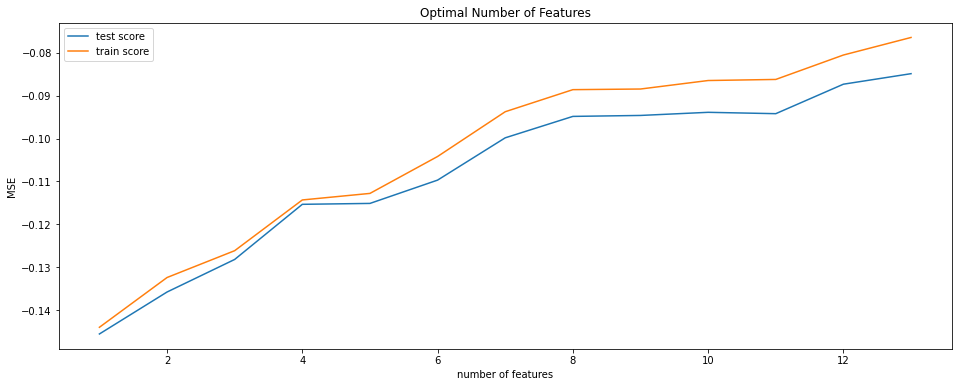

In [33]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('MSE')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [19]:
# k-fold CV (using all the 13 variables)
reg = LinearRegression()
scores = cross_val_score(reg, xtrain, ytrain, scoring='neg_mean_squared_error', cv=5)


array([-6.95665817e+21, -2.31859431e+21, -2.28555544e+22, -6.75062700e+20,
       -1.18944159e+23])

In [12]:
reg.score(xtest, ytest)

-2.129841971677429e+22

In [14]:
y_pred = reg.predict(xtest)

In [23]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(ytest, y_pred)


## 5.3 SVM Regressor

In [35]:
from sklearn.svm import SVR

In [41]:
# train the model on train set
model = SVR()
model.fit(xtrain, ytrain)
  
# print prediction results
ypred = model.predict(xtest)
errors = mean_squared_error(ytest, ypred)
print(errors)

0.022614301874836658


In [59]:
[x * 0.001 for x in range(0,100,10)]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [95]:
# defining parameter range
param_grid = {'C': [0.0001, 0.001, 0.01,0.1, 1 , 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly', 'rbf', 'sigmoid']}
model = SVR()
grid = RandomizedSearchCV(SVR(), param_grid, refit = True, verbose = 3)

grid.fit(xtrain,ytrain)
  

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...................C=10, gamma=0.1, kernel=poly; total time=   0.1s
[CV 2/5] END ...................C=10, gamma=0.1, kernel=poly; total time=   0.1s
[CV 3/5] END ...................C=10, gamma=0.1, kernel=poly; total time=   0.1s
[CV 4/5] END ...................C=10, gamma=0.1, kernel=poly; total time=   0.1s
[CV 5/5] END ...................C=10, gamma=0.1, kernel=poly; total time=   0.1s
[CV 1/5] END .............C=0.0001, gamma=0.001, kernel=poly; total time=   0.1s
[CV 2/5] END .............C=0.0001, gamma=0.001, kernel=poly; total time=   0.1s
[CV 3/5] END .............C=0.0001, gamma=0.001, kernel=poly; total time=   0.1s
[CV 4/5] END .............C=0.0001, gamma=0.001, kernel=poly; total time=   0.1s
[CV 5/5] END .............C=0.0001, gamma=0.001, kernel=poly; total time=   0.1s
[CV 1/5] END ..........C=0.0001, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV 2/5] END ..........C=0.0001, gamma=0.001, ke

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   verbose=3)

In [96]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}
SVR(C=100, gamma=0.0001)


In [97]:
# train the model on train set
model = SVR(C=0.001, gamma=1, kernel='poly')
model.fit(xtrain, ytrain)

# print prediction results
ypred = model.predict(xtest)
errors = mean_squared_error(ytest, ypred)
print(errors)

0.02041282734213652


In [69]:
pred = model.predict(test)

In [113]:
submission = pd.DataFrame({'Id':tes['Id'],'SalePrice':np.exp(pred)})

In [107]:
submission.SalePrice = submission.SalePrice.apply(np.int64)

In [108]:
submission

,Id,SalePrice
0,1461,119841
1,1462,154941
2,1463,178092
3,1464,196153
4,1465,183036
...,...,...
1454,2915,84534
1455,2916,74007
1456,2917,173979
1457,2918,116684


In [110]:
submission.to_csv('results.csv', index=False)

## XGBoost

In [111]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [112]:
model.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
ypred = model.predict(xtest)
errors = mean_squared_error(ytest, ypred)
print(errors)

0.013494593056279936


In [119]:
test.shape

(1459, 254)

In [131]:
pred = model.predict(test)

In [132]:
submission = pd.DataFrame({'Id':tes['Id'],'SalePrice':np.exp(pred)})
submission.SalePrice = submission.SalePrice.apply(np.int64)
submission.to_csv('results.csv', index=False)

## AdaBoostRegressor

In [38]:
from sklearn.ensemble import AdaBoostRegressor

regr = AdaBoostRegressor(random_state=0, n_estimators=300, learning_rate=0.1)
regr.fit(xtrain,ytrain)

AdaBoostRegressor(learning_rate=0.1, n_estimators=300, random_state=0)

In [39]:
ypred = regr.predict(xtest)

In [40]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(ytest, ypred)

In [41]:
errors

0.038081244372594296

In [ ]:
loss